# 影抽出

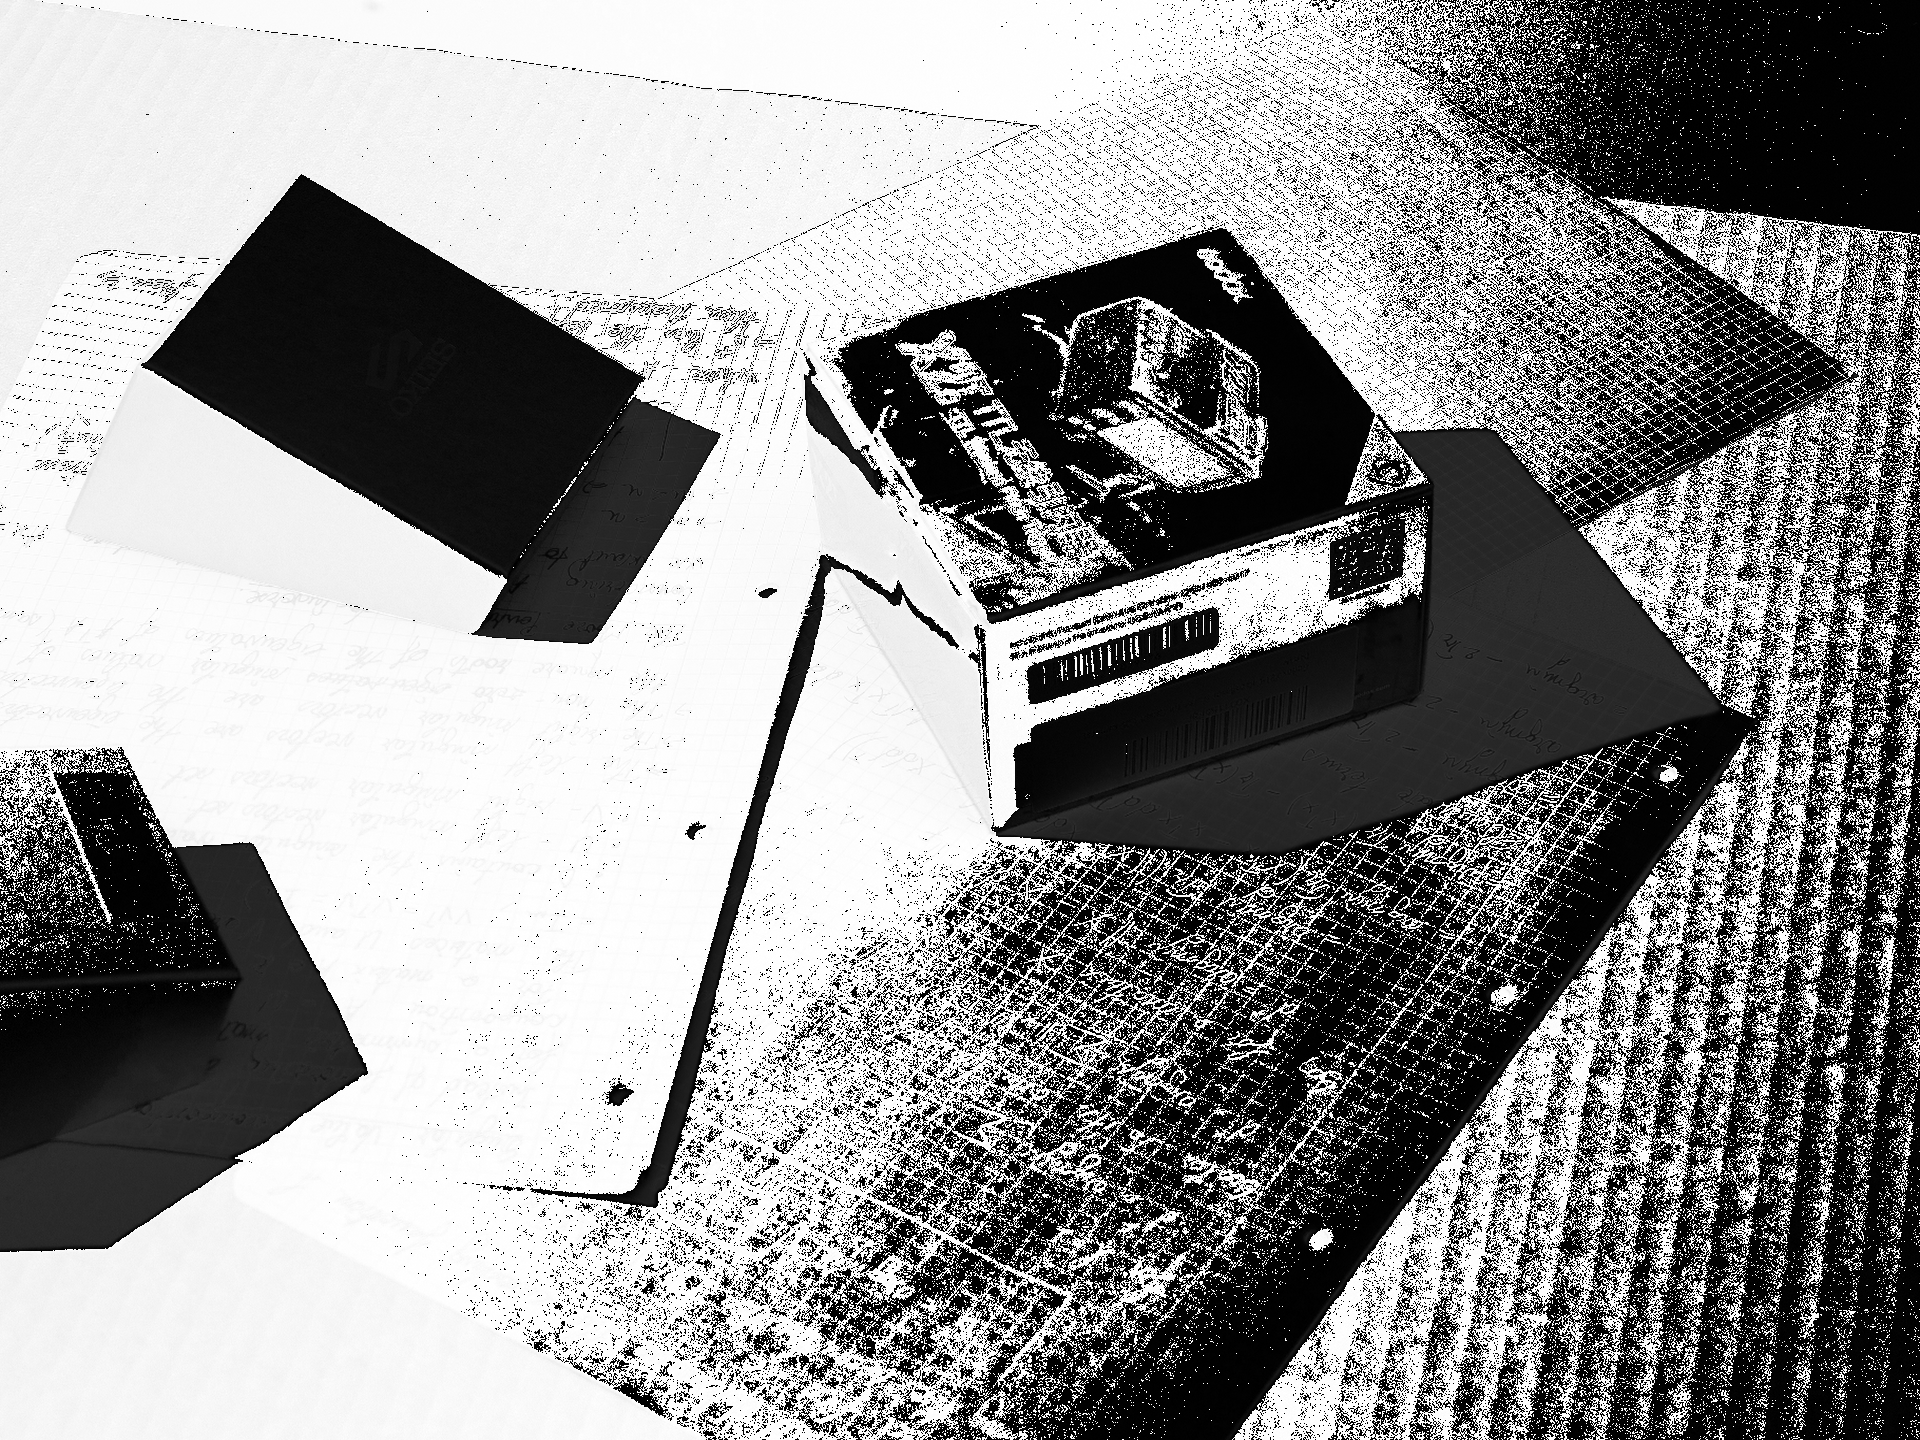

In [2]:
import os
from PIL import Image
from scipy import signal

# 33要注意

# diff_v = Image.open(os.path.join(path, 'diff_v', '0033.png'))
path = 'input data path'
diff_v = Image.open(os.path.join(path, 'diff_v.png'))

display(diff_v)

[ 10  16  45 255] {'peak_heights': array([ 885904.,  152527.,  153557., 1339815.])}


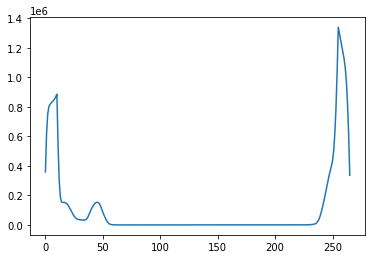

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

bins = np.bincount(np.reshape(diff_v, -1))
bins = np.convolve(bins, np.array([1,] * 11))
peaks, properties = find_peaks(bins, height=0)
print(peaks, properties)
plt.plot(bins)
plt.show()

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy import signal
from PIL import Image
import os

# path = '/home/naruki/works/NTIRE2023_ShadowRemoval_IIM_TTI/datasets/official_warped/train'
path = 'input data path'

for i in list(range(0, 900, 90))[1:2]:
    try:
        filename = f'{str(i).zfill(4)}.png'
        input_img = Image.open(os.path.join(path, 'input', filename))
        gt_img = Image.open(os.path.join(path, 'gt', filename))
        diff_v = Image.open(os.path.join(path, 'diff_v', filename))
        
    except:
        continue

    print(filename)
    # input_img.save('rgb_in.png')
    # gt_img.save('rgb_gt.png')
    display(diff_v)
    diff_v.save('diff_v.png')

    # ピクセル値の分布を取得
    bins = np.bincount(np.reshape(diff_v, -1))
    # 分布を平滑化（ノイズ対策）
    bins = np.convolve(bins, np.array([1,] * 11))
    
    # ピーク抽出
    peaks, properties = find_peaks(bins, height=0)
    heights = properties['peak_heights']

    plt.plot(bins)
    
    # 影は40~100の範囲内に収まると家庭
    shadow_peaks = np.where((40 <= peaks) & (peaks <= 100), peaks, None)
    
    shadow_peak = None
    shadow_peak_height = -1
    
    # 最大ピークを取得して影のピーク値とする
    for i, sp in enumerate(shadow_peaks):
        if sp == None:
            continue
        elif heights[i] > shadow_peak_height:
            shadow_peak_height = heights[i]
            shadow_peak = sp
             
    if shadow_peak:
        l_std = 40 # 影の下限 peak - l_std
        r_std = 15 # 影の上限 peak + r_std
        diff_v = np.array(diff_v)
        diff_v = np.where((shadow_peak - l_std < diff_v) & (diff_v < shadow_peak + r_std), 255, 0)
        diff_v = np.asarray(diff_v, dtype = np.uint8)
        
        # 平均フィルターを掛けてきれいに
        scharr = np.array([[1., 1., 1.],
                           [1., 1., 1.],
                           [1., 1., 1.]]) # Gx + j*Gy
        grad = signal.convolve2d(diff_v, scharr, boundary='symm', mode='same')
        grad = np.where(grad > 255 * 4.5, 255, 0)
        grad = np.asarray(grad, dtype = np.uint8)
        grad = Image.fromarray(grad)
        grad.save('mask_v.png')
        display(grad)
        
        plt.title('bincount of value')
        plt.ylabel('count')
        plt.xlabel('value')
        plt.axvline(shadow_peak, color = 'black')
        plt.axvline(shadow_peak - l_std, color = 'black', alpha = 0.5)
        plt.axvline(shadow_peak + r_std, color = 'black', alpha = 0.5)
    plt.savefig('bincount.png')
    plt.show()
    
    # print(shadow_peak)
    # print(shadow_peak_height)

In [95]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy import signal

path = '/home/naruki/works/NTIRE2023_ShadowRemoval_IIM_TTI/datasets/official_warped/train'

for i in list(range(900)):
    try:
        filename = f'{str(i).zfill(4)}.png'
        diff_v = Image.open(os.path.join(path, 'diff_v', filename))
    except:
        continue

    bins = np.bincount(np.reshape(diff_v, -1))
    bins = np.convolve(bins, np.array([1,] * 11))
    peaks, properties = find_peaks(bins, height=0)
    heights = properties['peak_heights']
    
    shadow_peaks = np.where((40 <= peaks) & (peaks <= 100), peaks, None)
    
    shadow_peak = None
    shadow_peak_height = -1
    
    for i, sp in enumerate(shadow_peaks):
        if sp == None:
            continue
        elif heights[i] > shadow_peak_height:
            shadow_peak_height = heights[i]
            shadow_peak = spit
             
    if shadow_peak:
        l_std = 40
        r_std = 15
        diff_v = np.array(diff_v)
        diff_v = np.where((shadow_peak - l_std < diff_v) & (diff_v < shadow_peak + r_std), 255, 0)
        diff_v = np.asarray(diff_v, dtype = np.uint8)
        
        scharr = np.array([[1., 1., 1.],
                           [1., 1., 1.],
                           [1., 1., 1.]]) # Gx + j*Gy
        grad = signal.convolve2d(diff_v, scharr, boundary='symm', mode='same')
        grad = np.where(grad > 255 * 4.5, 255, 0)
        grad = np.asarray(grad, dtype = np.uint8)
        grad = Image.fromarray(grad)
        grad.save(os.path.join(path, 'mask_v', filename))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy import signal

path = '/home/naruki/works/NTIRE2023_ShadowRemoval_IIM_TTI/datasets/official_warped/val'

for i in list(range(900, 1000)):
    try:
        filename = f'{str(i).zfill(4)}.png'
        diff_v = Image.open(os.path.join(path, 'diff_v', filename))
    except:
        continue

    bins = np.bincount(np.reshape(diff_v, -1))
    bins = np.convolve(bins, np.array([1,] * 11))
    peaks, properties = find_peaks(bins, height=0)
    heights = properties['peak_heights']
    
    shadow_peaks = np.where((40 <= peaks) & (peaks <= 100), peaks, None)
    
    shadow_peak = None
    shadow_peak_height = -1
    
    for i, sp in enumerate(shadow_peaks):
        if sp == None:
            continue
        elif heights[i] > shadow_peak_height:
            shadow_peak_height = heights[i]
            shadow_peak = sp
             
    if shadow_peak:
        l_std = 40
        r_std = 15
        diff_v = np.array(diff_v)
        diff_v = np.where((shadow_peak - l_std < diff_v) & (diff_v < shadow_peak + r_std), 255, 0)
        diff_v = np.asarray(diff_v, dtype = np.uint8)
        
        scharr = np.array([[1., 1., 1.],
                           [1., 1., 1.],
                           [1., 1., 1.]]) # Gx + j*Gy
        grad = signal.convolve2d(diff_v, scharr, boundary='symm', mode='same')
        grad = np.where(grad > 255 * 4.5, 255, 0)
        grad = np.asarray(grad, dtype = np.uint8)
        grad = Image.fromarray(grad)
        grad.save(os.path.join(path, 'mask_v', filename))

# 残りの影抽出

In [52]:
import os


dir_path = '/home/naruki/works/NTIRE2023_ShadowRemoval_IIM_TTI/datasets/official_warped/train'
mask_v = os.listdir(os.path.join(dir_path, 'mask_v'))
diff_v = os.listdir(os.path.join(dir_path, 'diff_v'))

yet_files = []
for f in diff_v:
    if f not in mask_v:
        yet_files.append(f)
print(yet_files)

[]


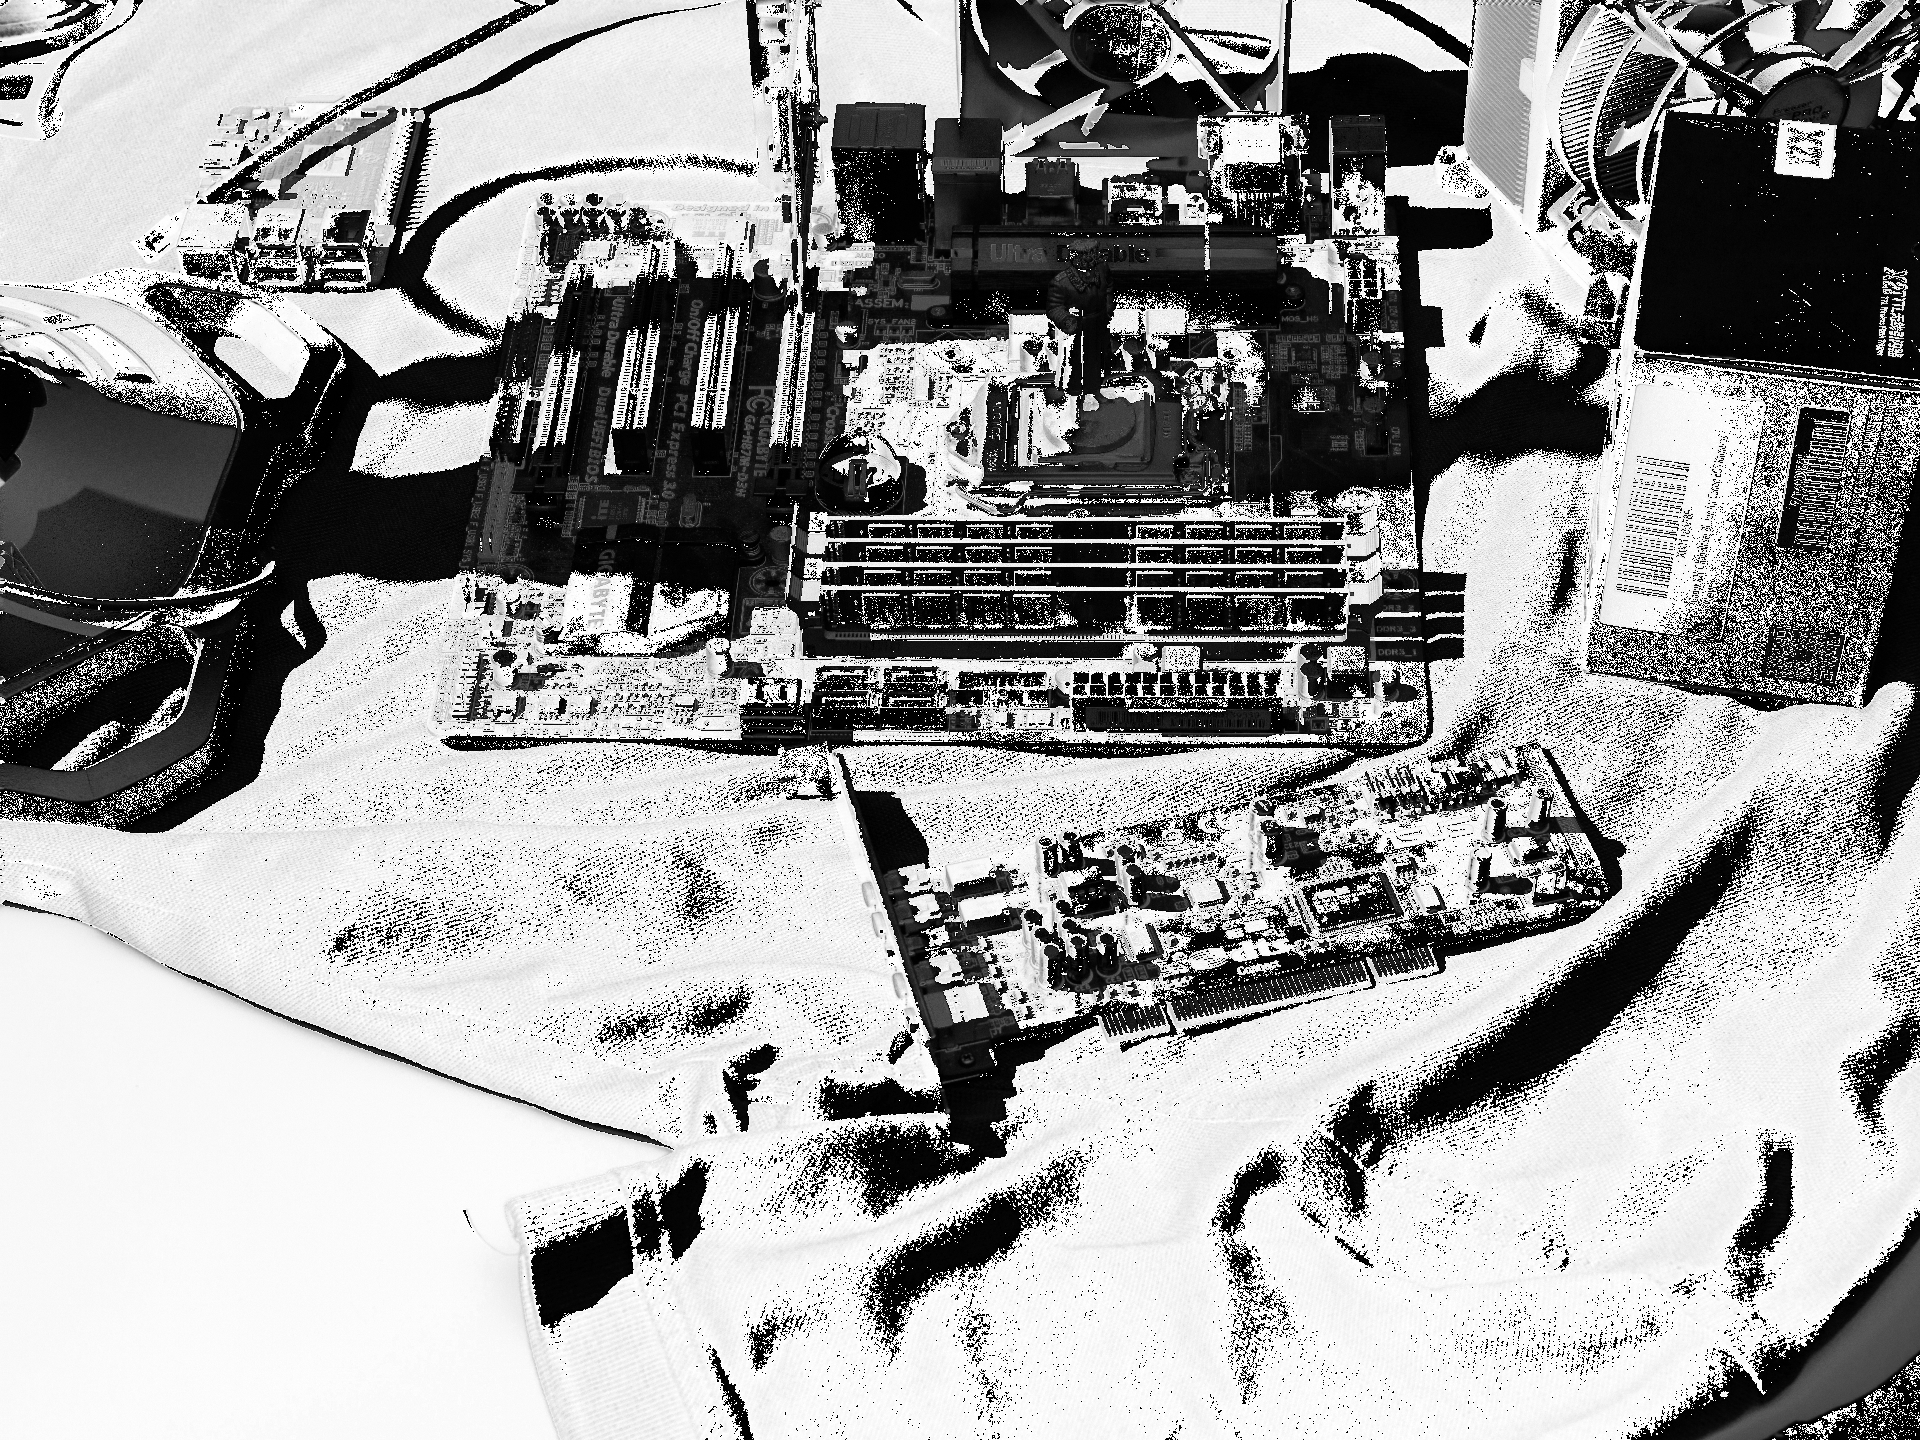

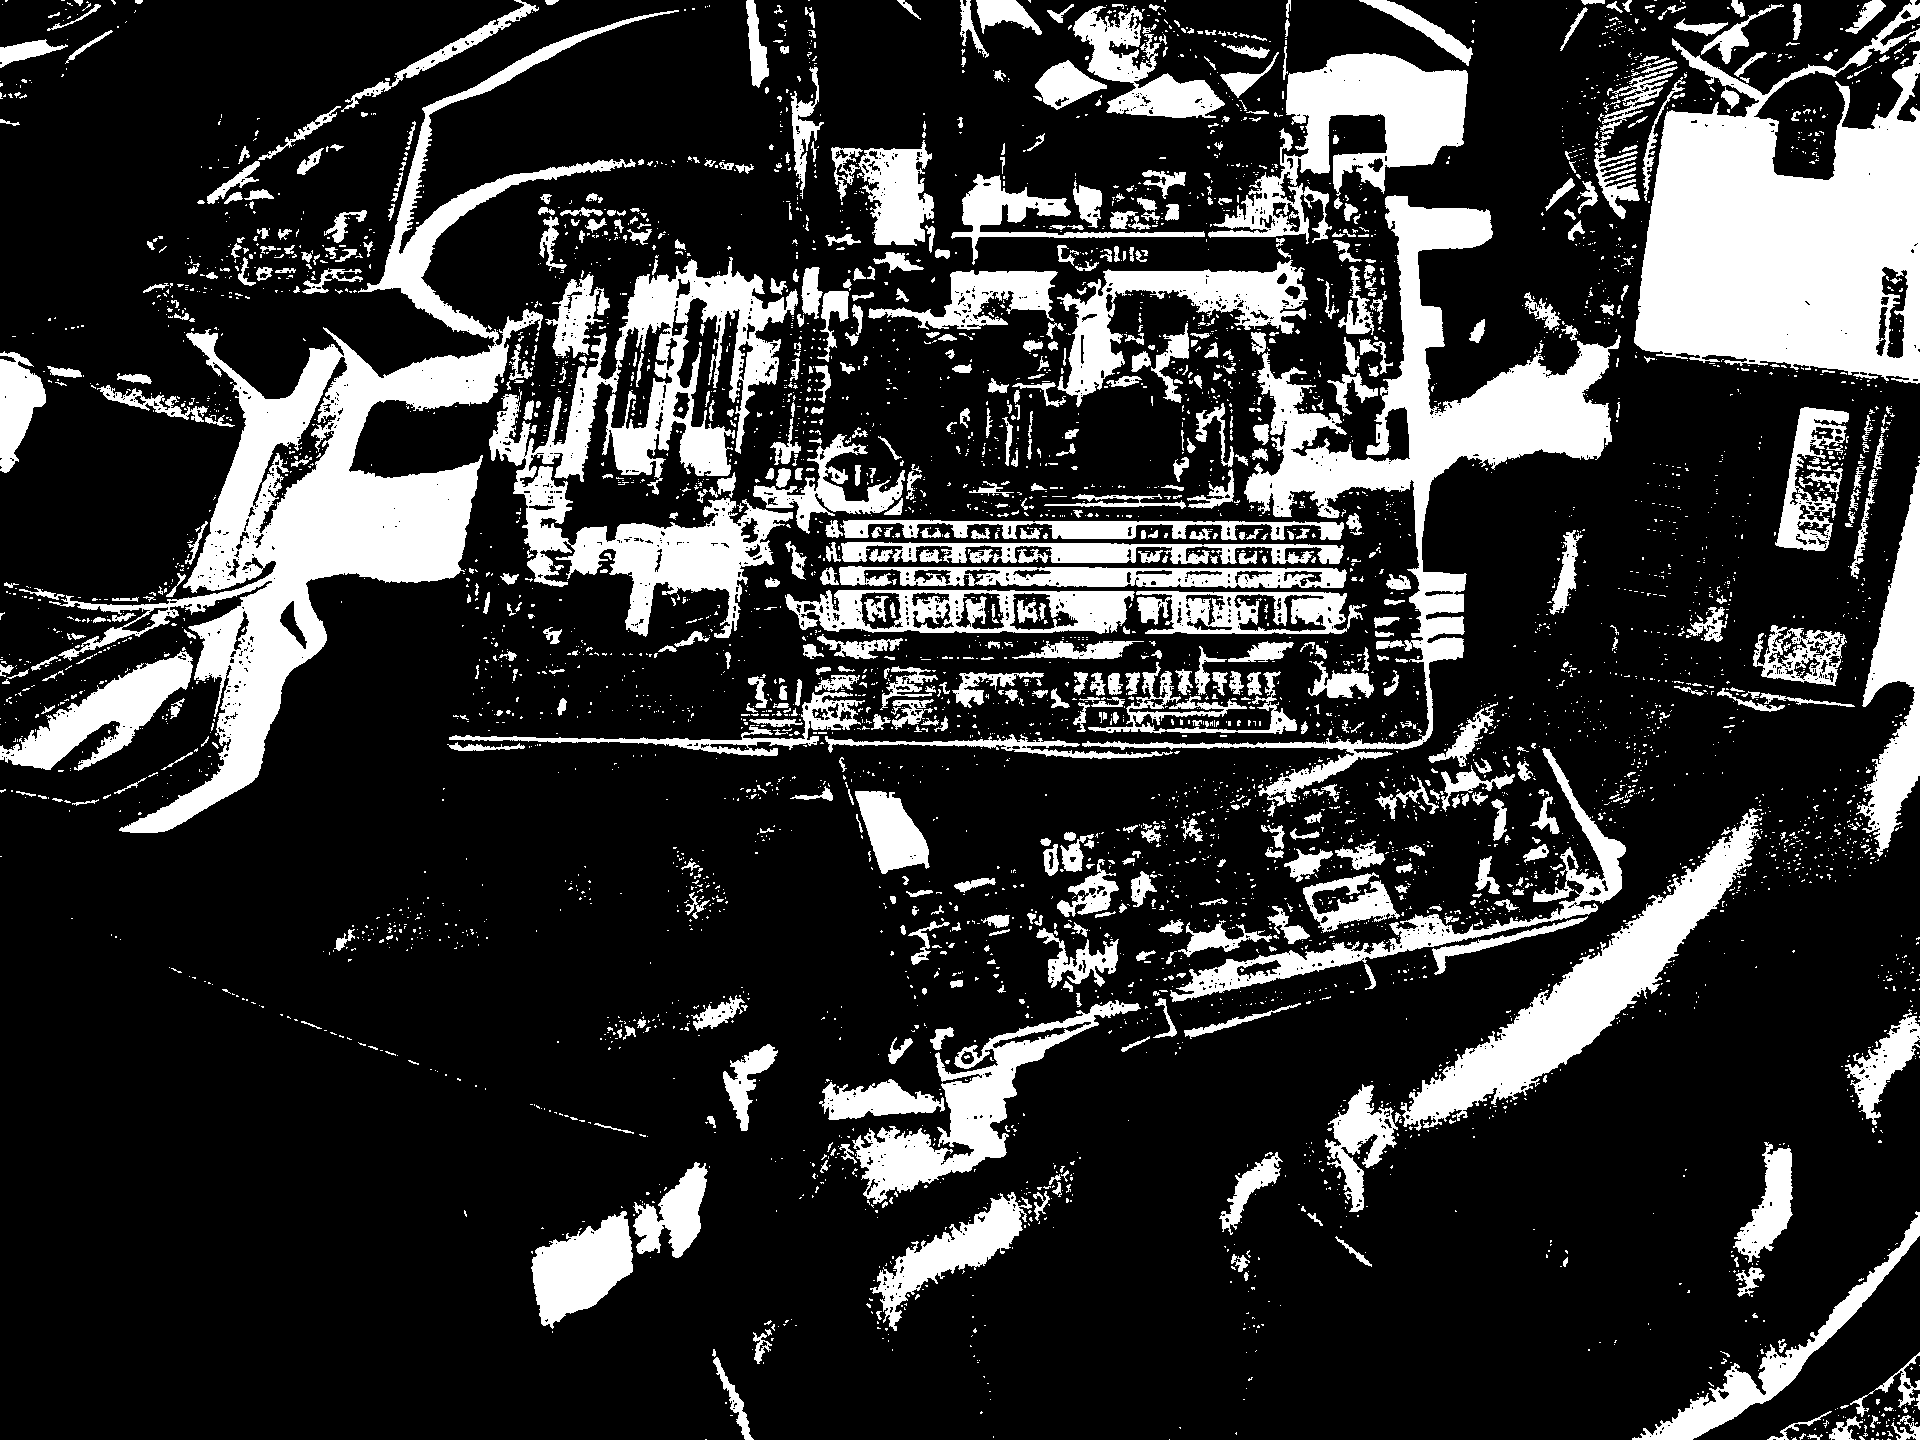

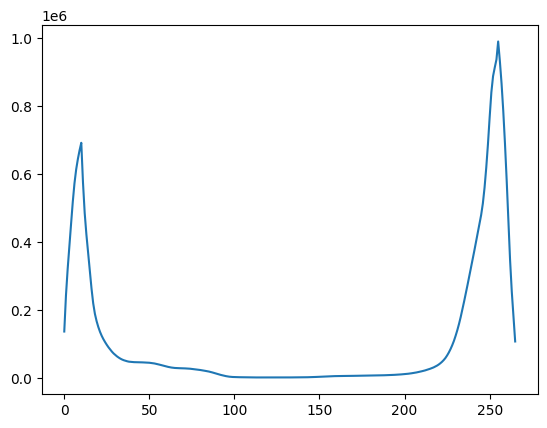

In [56]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy import signal

path = '/home/naruki/works/NTIRE2023_ShadowRemoval_IIM_TTI/datasets/official_warped/train'
file_paths = [33, 103, 383, 415, 427, 484, 505]
i = file_paths[6]

filename = f'{str(i).zfill(4)}.png'
diff_v = Image.open(os.path.join(path, 'diff_v', filename))

display(diff_v)

# ピクセル値の分布を取得
bins = np.bincount(np.reshape(diff_v, -1))
# 分布を平滑化（ノイズ対策）
bins = np.convolve(bins, np.array([1,] * 11))

# ピーク抽出
peaks, properties = find_peaks(bins, height=0)
heights = properties['peak_heights']

plt.plot(bins)

# 影は40~100の範囲内に収まると家庭
shadow_peaks = np.where((10 <= peaks) & (peaks <= 30), peaks, None)

shadow_peak = None
shadow_peak_height = -1

# 最大ピークを取得して影のピーク値とする
for i, sp in enumerate(shadow_peaks):
    if sp == None:
        continue
    elif heights[i] > shadow_peak_height:
        shadow_peak_height = heights[i]
        shadow_peak = sp

if shadow_peak:
    l_std = 10 # 影の下限 peak - l_std
    r_std = 5 # 影の上限 peak + r_std
    diff_v = np.array(diff_v)
    diff_v = np.where((shadow_peak - l_std < diff_v) & (diff_v < shadow_peak + r_std), 255, 0)
    diff_v = np.asarray(diff_v, dtype = np.uint8)

    # 平均フィルターを掛けてきれいに
    scharr = np.array([[1., 1., 1.],
                       [1., 1., 1.],
                       [1., 1., 1.]]) # Gx + j*Gy
    grad = signal.convolve2d(diff_v, scharr, boundary='symm', mode='same')
    grad = np.where(grad > 255 * 4.5, 255, 0)
    grad = np.asarray(grad, dtype = np.uint8)
    grad = Image.fromarray(grad)
    # grad.save(os.path.join(path, 'mask_v', filename))
    display(grad)

    # plt.axvline(shadow_peak, color = 'black')
    # plt.axvline(shadow_peak - l_std, color = 'black', alpha = 0.5)
    # plt.axvline(shadow_peak + r_std, color = 'black', alpha = 0.5)
plt.show()

# print(shadow_peak)
# print(shadow_peak_height)